In [1]:
import pandas as pd
import os, sys
import numpy as np
import random

In [2]:
os.chdir("C:/Users/USER/Desktop/DSC")

# 같은 기간동안 DOW 지수

In [3]:
dow= pd.read_csv("dow.csv")

In [4]:
dow=np.array(dow)
dow=dow.reshape([330])

In [5]:
idx=np.sort(random.sample(range(0, 329), 323))
dow=dow[idx]

In [6]:
min=dow[np.argmin(dow)]
max=dow[np.argmax(dow)]
     

In [7]:
for i in range(len(dow)):
    dow[i]=(dow[i]-min)/(max-min)   

# 거래량 많고 데이터 보존되어있는 500개의 종목 고르기

In [8]:
df= pd.read_csv("st_data_itemChargeFull.txt",sep="\t",encoding='UTF-16')
df=df[(df.market == 'KOSPI')]
df=df[['itemname','date','close_val','acc_quant']]

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
itemname=np.array(df['itemname'])
itemname=np.unique(itemname)
len(itemname)

881

In [10]:
timeseries=[]
for i in range(len(itemname)):
    timeseries.append( df[(df.itemname == itemname[i])] )

In [11]:
max=0
for i in range(len(timeseries)):
    if len(timeseries[i])>max:
        max=len(timeseries[i])
max

323

In [12]:
timeseries_final=[]
for i in range(len(timeseries)):
    if len(timeseries[i])==323 :
        timeseries_final.append(timeseries[i])
len(timeseries_final)

802

In [13]:
len(itemname)

881

In [14]:
volume=[]
for i in range(len(timeseries_final)):
    volume.append(np.mean(timeseries_final[i]['acc_quant']))

In [15]:
array = np.array(volume)
order = array.argsort()
ranks = order.argsort()

In [16]:
final=[]
for i in range(len(timeseries_final)):
    if (ranks[i]>301):
        final.append(timeseries_final[i])

In [17]:
#final : 거래량이 가장 많았고, 3년간의 데이터가 모두 축적되어있는 30개의 코스피 종목의 종가 데이터
#itemname : 그 30개의 이름을 가지고 있는 리스트
itemname=[]
for i in range(len(final)):
    itemname.append(final[i]['itemname'].iloc[0])

In [18]:
len(itemname)

500

In [19]:
#date : 그 30개의 날짜를 가지고 있는 리스트
date=final[0]['date']

In [20]:
#data 그 30개의 시계열 데이터를 담고 있는 리스트
data=[]
for i in range(len(final)):
    data.append(final[i]['close_val'])

In [21]:
#data[0].iloc[np.argmax(data[0])]
data=np.array(data)

In [22]:
len(data)

500

In [23]:
for i in range(len(data)):
    min=data[i][np.argmin(data[i])]
    max=data[i][np.argmax(data[i])]
    for j in range(len(date)):
        data[i][j]=(data[i][j]-min)/(max-min)        

In [24]:
data

array([[0.89748369, 0.88816403, 0.8555452 , ..., 0.36626281, 0.32432432,
        0.37092265],
       [0.30612618, 0.30247421, 0.30886515, ..., 0.00465626, 0.00429106,
        0.00328677],
       [0.68574635, 0.74186308, 0.74186308, ..., 0.01459035, 0.0359147 ,
        0.02356902],
       ...,
       [0.6424581 , 0.62290503, 0.7122905 , ..., 0.61173184, 0.66201117,
        0.70111732],
       [0.09364162, 0.13294798, 0.20924855, ..., 0.32138728, 0.26705202,
        0.26473988],
       [0.64562717, 0.60550949, 0.62021931, ..., 0.01230275, 0.00748863,
        0.        ]])

In [25]:
import matplotlib.pyplot as plt

In [26]:
len(data)

500

In [41]:
data

array([[0.89748369, 0.88816403, 0.8555452 , ..., 0.36626281, 0.32432432,
        0.37092265],
       [0.30612618, 0.30247421, 0.30886515, ..., 0.00465626, 0.00429106,
        0.00328677],
       [0.68574635, 0.74186308, 0.74186308, ..., 0.01459035, 0.0359147 ,
        0.02356902],
       ...,
       [0.6424581 , 0.62290503, 0.7122905 , ..., 0.61173184, 0.66201117,
        0.70111732],
       [0.09364162, 0.13294798, 0.20924855, ..., 0.32138728, 0.26705202,
        0.26473988],
       [0.64562717, 0.60550949, 0.62021931, ..., 0.01230275, 0.00748863,
        0.        ]])

# DOW 지수와 500개 종목 시계열 데이터 간의 거리를 Dynamic Time Warping 기법을 통해서 구하기 

In [28]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + np.min([DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)]])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [29]:
a=np.zeros(len(data))
for i in range(len(data)):
    print(i)
    a[i]=DTWDistance(dow,data[i])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [31]:
a

array([ 4.23853576,  6.57909594,  7.58851386,  5.62748054,  5.05740064,
        5.70413936,  5.24218721,  9.30635254,  5.63723354,  2.09995875,
        1.95165083,  4.53920678,  6.11649816,  5.94737041,  1.33667125,
        5.84237285,  2.1171383 ,  1.09249001,  8.05735607,  3.79405568,
        5.61029806,  5.10180171,  4.60803408,  5.26274919,  4.07133462,
        3.92133192,  3.69063586,  0.88074149,  5.03906879,  7.31495434,
        7.24050634,  3.86118592,  2.20834055,  7.40683312,  4.4370017 ,
        2.40485243,  2.2464626 ,  7.21533304,  7.28259694,  5.1123292 ,
        2.06391445,  5.01874766,  5.61959914,  1.65134431,  2.09906006,
        1.69465994,  1.49062448,  1.52500638,  2.38569175,  4.91041371,
        3.72370166,  2.49797266,  5.24144657,  3.46972092,  2.43560013,
        1.78217848,  5.56619991,  6.28872113,  0.79751944,  7.33148251,
        4.89892066,  4.79057256,  5.75358376,  5.9830999 ,  2.78500752,
        2.75359884,  6.37466741,  6.16743765,  0.74374199,  3.72

In [32]:
array_a = np.array(a)
order_a = array_a.argsort()
ranks_a = order_a.argsort()

In [33]:
ranks_a

array([238, 402, 453, 342, 290, 346, 305, 489, 343,  90,  78, 255, 378,
       363,  27, 354,  93,  14, 473, 208, 337, 297, 258, 306, 228, 218,
       196,   5, 289, 436, 427, 211,  99, 439, 245, 119, 104, 426, 433,
       298,  87, 287, 340,  47,  89,  52,  34,  37, 115, 277, 198, 126,
       304, 183, 121,  67, 334, 384,   3, 437, 274, 268, 349, 366, 142,
       138, 391, 380,   1, 197, 200, 250,   2, 186, 314, 460, 443, 479,
       266, 282,  17, 107, 112, 247, 159, 319, 407, 131, 135, 276, 468,
       116, 242, 415,  88, 322, 423, 111, 295, 252,  98, 103,  20, 490,
        74, 373, 397, 300, 241,  63, 215, 291, 185, 341, 455,  79, 440,
       219, 134,  24,  83, 212, 267, 106, 260, 449,  12, 182, 164, 223,
       261, 396, 379, 141, 487, 199, 364, 137, 239,  15,   4, 410, 123,
       438,  30, 130, 326, 271, 204, 256,  41, 347,  59, 161,  75, 488,
       393,  96, 265, 180,  70, 181, 475, 220, 368, 403, 165, 259, 101,
        77, 188, 229, 292,  61, 499,  53, 195, 189, 275, 148, 16

In [59]:
sim_item=[]
dis_item=[]
for i in range(500):
    if(ranks_a[i]<30):
        sim_item.append(i)
        
    if(ranks_a[i]>469):
        dis_item.append(i)

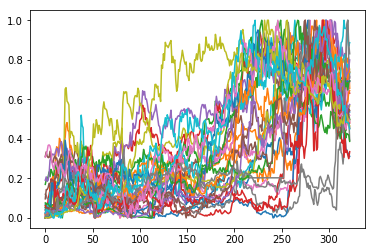

In [61]:
x=np.arange(len(date))
for i in sim_item:
    y=data[i]
    plt.plot(x,y)
plt.show()

In [68]:
sim_item=[]
dis_item=[]
for i in range(500):
    if(ranks_a[i]<30):
        sim_item.append(itemname[i])
        
    if(ranks_a[i]>469):
        dis_item.append(itemname[i])

In [73]:
sim_item

['F&F',
 'GS건설',
 'KB금융',
 'S-Oil',
 'SK이노베이션',
 'SK하이닉스',
 '경농',
 '남선알미늄',
 '대신증권우',
 '대웅제약',
 '대호에이엘',
 '더존비즈온',
 '메리츠화재',
 '무림P&P',
 '삼성SDI',
 '삼성전기',
 '삼진제약',
 '상상인증권',
 '셀트리온',
 '엔씨소프트',
 '우신시스템',
 '일진머티리얼즈',
 '제이준코스메틱',
 '조비',
 '코스모신소재',
 '태영건설',
 '하나금융지주',
 '한창제지',
 '화승인더',
 '후성']

# 다우 지수와 유사한 상위 30개 종목의 업종 Crawling & Visualization (WordCloud)

In [74]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [148]:
categories=[]
for i in range(len(sim_item)):
    if i>-1:
    
        driver= webdriver.Chrome('/Users/USER/Desktop/chromedriver')
        driver.get('https://finance.naver.com/')
        driver.implicitly_wait(1)
        search=driver.find_element_by_xpath('//*[@id="stock_items"]')
        search.send_keys(sim_item[i])
        search.submit()
        
        try:
            data=driver.find_element_by_xpath('//*[@id="content"]/div[5]/h4/em/a').text
            categories.append(data)
        
        except:
            driver.find_element_by_xpath('//*[@id="content"]/div[4]/table/tbody/tr[1]/td[1]/a').click()
            data=driver.find_element_by_xpath('//*[@id="content"]/div[5]/h4/em/a').text
            categories.append(data)
        driver.implicitly_wait(1)
        driver.quit()


In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

text=open("upjong.txt").read()
    
wordcloud = WordCloud('C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600,max_font_size=150).generate(str(categories))

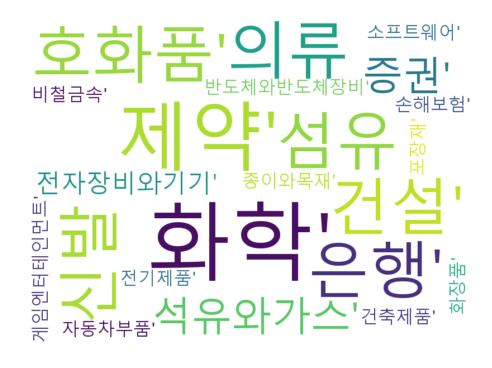

In [155]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()